In [1]:
# load dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Align Prediction Features and Model-creation Features

In [2]:
# import data
from mega import model_df, unplayed_games

df = model_df.copy()
unplayed_games_clean = unplayed_games[3:].copy()

In [3]:
# check imported file
df.head()

Gm# W/L D/N H/A  Opp  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
0    1   L   D   A  MIL           31  0.258065         8       1       8   
1    2   W   N   A  MIL           32  0.281250         9       1       5   
2    3   W   N   A  MIL           34  0.264706         9       1       5   
3    4   W   D   H  SDP           33  0.212121         7       0       8   
4    5   W   N   H  SDP           33  0.242424         8       0       4   

    COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  OPP_HR_Column OPP_kk  \
0  0.351351          4           38  0.315789       12              3     11   
1  0.342857          3           37  0.378378       14              2     11   
2  0.305556          2           37  0.405405       15              3      8   
3  0.235294          1            0  0.000000        0              0      0   
4  0.305556          3            0  0.000000        0              0      0   

    Opp_obp  Opp_walks  
0  0.333333          1  
1  0.390244          2  
2  0.463415          4  
3  0.000000          0  
4  0.000000          0

In [4]:
# check imported file
unplayed_games_clean.head()

Gm#      W/L                        D/N H/A  Opp  COL_at_bats  COL_ba  \
1816  137  8:10 pm  Game Preview and Matchups   H  BAL           -1    -1.0   
1817  138  3:10 pm  Game Preview and Matchups   H  BAL           -1    -1.0   
1818  139  7:20 pm  Game Preview and Matchups   A  ATL           -1    -1.0   
1819  140  7:20 pm  Game Preview and Matchups   A  ATL           -1    -1.0   
1820  141  7:20 pm  Game Preview and Matchups   A  ATL           -1    -1.0   

      COL_hits  COL_hr  COL_kk  COL_obp  COL_walks  Opp_at_bats    Opp_ba  \
1816        -1      -1      -1     -1.0         -1           29  0.310345   
1817        -1      -1      -1     -1.0         -1           30  0.200000   
1818        -1      -1      -1     -1.0         -1           31  0.193548   
1819        -1      -1      -1     -1.0         -1           -1 -1.000000   
1820        -1      -1      -1     -1.0         -1           -1 -1.000000   

     Opp_hits  OPP_HR_Column OPP_kk   Opp_obp  Opp_walks  
1816        9              0      9  0.393939          4  
1817        6              0     11  0.250000          2  
1818       -1              0     -1  0.218750         -1  
1819       -1             -1     -1 -1.000000         -1  
1820       -1             -1     -1 -1.000000         -1

In [5]:
# drop the "Opp" column, so that we dont have to encode all the team names. 
# Not all teams that are in the model df "df" exist in the prediction df "unplayed_games_clean"
# this ensures that the same number of features are used between creating the RF model and predicting

df = df.copy().drop(columns=["Opp", "Gm#"])


# drop Opp later in "unplayed_games_clean" in the code, after this column is no longer needed for season calcuations

In [6]:
print(f"Model df columns = {df.columns}")
print()
print(f"Prediction df columns = {unplayed_games_clean.columns}")

Model df columns = Index(['W/L', 'D/N', 'H/A', 'COL_at_bats', 'COL_ba', 'COL_hits', 'COL_hr',
       'COL_kk', 'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba', 'Opp_hits',
       'OPP_HR_Column', 'OPP_kk', 'Opp_obp', 'Opp_walks'],
      dtype='object')

Prediction df columns = Index(['Gm#', 'W/L', 'D/N', 'H/A', 'Opp', 'COL_at_bats', 'COL_ba', 'COL_hits',
       'COL_hr', 'COL_kk', 'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba',
       'Opp_hits', 'OPP_HR_Column', 'OPP_kk', 'Opp_obp', 'Opp_walks'],
      dtype='object')


# Prep Data for ML

In [7]:
# check data types

df.dtypes

W/L               object
D/N               object
H/A               object
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits          object
OPP_HR_Column      int64
OPP_kk            object
Opp_obp          float64
Opp_walks          int64
dtype: object

In [8]:
df = df.rename(columns={"OPP_HR_Column": "Opp_hr"})

In [9]:
# confirm there are only 2 values in the win/loss column
uniquevalues = df["W/L"].unique()
print(uniquevalues)

['L' 'W']


In [10]:
# encode object columns as needed
# intialize encoders
le = LabelEncoder()

In [11]:
# encode columns with only 2 unique values
df["D/N"] = le.fit_transform(df["D/N"])
df["H/A"] = le.fit_transform(df["H/A"])
df["W/L"] = le.fit_transform(df["W/L"])
df

W/L  D/N  H/A  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk  \
0       0    0    0           31  0.258065         8       1       8   
1       1    1    0           32  0.281250         9       1       5   
2       1    1    0           34  0.264706         9       1       5   
3       1    0    1           33  0.212121         7       0       8   
4       1    1    1           33  0.242424         8       0       4   
...   ...  ...  ...          ...       ...       ...     ...     ...   
1808    0    1    0           28  0.178571         5       2       5   
1809    1    0    0           29  0.172414         5       1       9   
1810    0    0    0           35  0.342857        12       5       6   
1811    1    1    1           34  0.264706         9       0       8   
1812    0    1    1           35  0.342857        12       2       5   

       COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  Opp_hr OPP_kk  \
0     0.351351          4           38  0.315789       12       3     11   
1     0.342857          3           37  0.378378       14       2     11   
2     0.305556          2           37  0.405405       15       3      8   
3     0.235294          1            0  0.000000        0       0      0   
4     0.305556          3            0  0.000000        0       0      0   
...        ...        ...          ...       ...      ...     ...    ...   
1808  0.233333          2           31  0.129032        4       0      9   
1809  0.294118          4           39  0.333333       13       2     14   
1810  0.410256          3           29  0.206897        6       0      8   
1811  0.324324          3           28  0.214286        6       1     11   
1812  0.428571          6           34  0.382353       13       4      8   

       Opp_obp  Opp_walks  
0     0.333333          1  
1     0.390244          2  
2     0.463415          4  
3     0.000000          0  
4     0.000000          0  
...        ...        ...  
1808  0.205882          3  
1809  0.386364          4  
1810  0.323529          5  
1811  0.312500          4  
1812  0.405405          1  

[1751 rows x 17 columns]

In [12]:
# debug: Locate the positions of "error"
error_positions = df.isin(['error'])

# get the indices of "error" values
error_indices = [(row, col) for row, col in zip(*error_positions.to_numpy().nonzero())]

# Display the indices
print("\nIndices of 'error' values:")
print(error_indices)


Indices of 'error' values:
[(37, 14), (1118, 12)]


In [22]:
# apply new values to those data cells
df.iloc[37, 14] = 0
df.iloc[1118, 12] = 0


In [23]:
# ensure column values are numerical
df['OPP_kk'] = pd.to_numeric(df['OPP_kk'], errors='coerce')
df['Opp_hits'] = pd.to_numeric(df['Opp_hits'], errors='coerce')

In [24]:
# check dtypes for all columns again
df.dtypes

W/L              int32
D/N              int32
H/A              int32
COL_at_bats      int64
COL_ba         float64
COL_hits         int64
COL_hr           int64
COL_kk           int64
COL_obp        float64
COL_walks        int64
Opp_at_bats      int64
Opp_ba         float64
Opp_hits       float64
Opp_hr           int64
OPP_kk         float64
Opp_obp        float64
Opp_walks        int64
dtype: object

In [25]:
# Get target variable ("win/loss" column) - y 
y = df["W/L"]
len(y)

1751

In [26]:
# Get the features - X
X = df.copy()
X =X.drop(columns = "W/L", axis =1)
X

D/N  H/A  COL_at_bats    COL_ba  COL_hits  COL_hr  COL_kk   COL_obp  \
0       0    0           31  0.258065         8       1       8  0.351351   
1       1    0           32  0.281250         9       1       5  0.342857   
2       1    0           34  0.264706         9       1       5  0.305556   
3       0    1           33  0.212121         7       0       8  0.235294   
4       1    1           33  0.242424         8       0       4  0.305556   
...   ...  ...          ...       ...       ...     ...     ...       ...   
1808    1    0           28  0.178571         5       2       5  0.233333   
1809    0    0           29  0.172414         5       1       9  0.294118   
1810    0    0           35  0.342857        12       5       6  0.410256   
1811    1    1           34  0.264706         9       0       8  0.324324   
1812    1    1           35  0.342857        12       2       5  0.428571   

      COL_walks  Opp_at_bats    Opp_ba  Opp_hits  Opp_hr  OPP_kk   Opp_obp  \
0             4           38  0.315789      12.0       3    11.0  0.333333   
1             3           37  0.378378      14.0       2    11.0  0.390244   
2             2           37  0.405405      15.0       3     8.0  0.463415   
3             1            0  0.000000       0.0       0     0.0  0.000000   
4             3            0  0.000000       0.0       0     0.0  0.000000   
...         ...          ...       ...       ...     ...     ...       ...   
1808          2           31  0.129032       4.0       0     9.0  0.205882   
1809          4           39  0.333333      13.0       2    14.0  0.386364   
1810          3           29  0.206897       6.0       0     8.0  0.323529   
1811          3           28  0.214286       6.0       1    11.0  0.312500   
1812          6           34  0.382353      13.0       4     8.0  0.405405   

      Opp_walks  
0             1  
1             2  
2             4  
3             0  
4             0  
...         ...  
1808          3  
1809          4  
1810          5  
1811          4  
1812          1  

[1751 rows x 16 columns]

In [27]:
X.columns

Index(['D/N', 'H/A', 'COL_at_bats', 'COL_ba', 'COL_hits', 'COL_hr', 'COL_kk',
       'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba', 'Opp_hits', 'Opp_hr',
       'OPP_kk', 'Opp_obp', 'Opp_walks'],
      dtype='object')

### split and scale data

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
# 9, 

In [29]:
# scale the data!
# Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same parameters
X_test_scaled = scaler.transform(X_test)



# Decision Tree

In [60]:
# create decision tree classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [61]:
# Validate the model accuracy with model.score
print('Decision Tree Classifier Model - Train Accuracy: %.3f' % dt_model.score(X_train_scaled, y_train))
print('Decision Tree Classifier Model - Test Accuracy: %.3f' % dt_model.score(X_test_scaled, y_test))

Decision Tree Classifier Model - Train Accuracy: 0.999
Decision Tree Classifier Model - Test Accuracy: 0.744


- Model test score is less than project-allowed minimum. 
- Next: explore tuning the model to improve performance.

In [62]:
# hypertune the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report 

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [70,80, 90],
    'min_samples_leaf': [6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [66]:
# Evaluate on the test set
y_pred = grid_search.predict(X_test_scaled)
report = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)



Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 90}
Best Cross-Validation Score: 0.7532058166197428


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       275
           1       0.69      0.69      0.69       163

    accuracy                           0.77       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.77      0.77      0.77       438



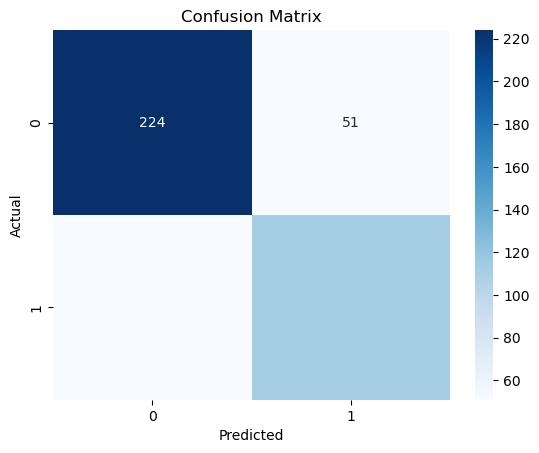

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_dt_pred = grid_search.predict(X_test_scaled)
conf_matrix_dt= confusion_matrix(y_test, y_dt_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Visualize the confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [64]:
# create decision tree classifier model
dt_model2 = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 8, min_samples_split= 80)
dt_model2.fit(X_train_scaled, y_train)

# Validate the model accuracy with model.score
print('Decision Tree Classifier Model - Train Accuracy: %.3f' % dt_model2.score(X_train_scaled, y_train))
print('Decision Tree Classifier Model - Test Accuracy: %.3f' % dt_model2.score(X_test_scaled, y_test))

Decision Tree Classifier Model - Train Accuracy: 0.807
Decision Tree Classifier Model - Test Accuracy: 0.758


- Tuning the model did not bring up the test accuracy score to acceptable levels. 

# Random Forest

In [30]:
# Create the random forest classifier model
# with n_estimators=128 | change as needed, or run multiple n_estimators...?
rf_model = RandomForestClassifier(n_estimators=128, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features="auto", random_state=0)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

c:\Users\elcoo\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_weight_fraction_leaf=0,
                       n_estimators=128, random_state=0)

In [31]:
# Validate the model by checking the model accuracy with model.score
print('Random Forest Classifier Model - Train Accuracy: %.3f' % rf_model.score(X_train_scaled, y_train))
print('Random Forest Classifier Model - Test Accuracy: %.3f' % rf_model.score(X_test_scaled, y_test))

Random Forest Classifier Model - Train Accuracy: 0.999
Random Forest Classifier Model - Test Accuracy: 0.820


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       275
           1       0.78      0.72      0.75       163

    accuracy                           0.82       438
   macro avg       0.81      0.80      0.80       438
weighted avg       0.82      0.82      0.82       438



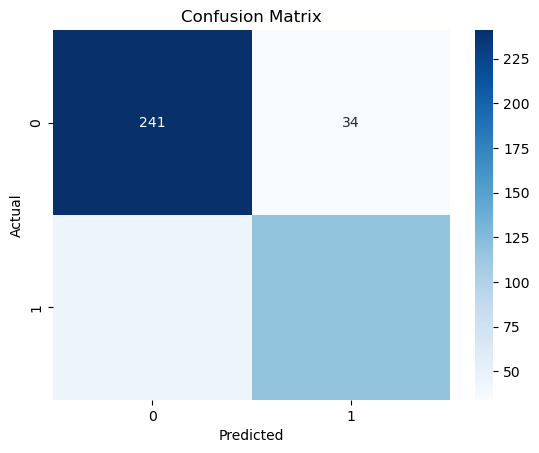

In [32]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_rf_pred = rf_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_rf_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_rf_pred))

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Prepping Prediction Data

In [33]:
# convert w/l column values into datatime objects, eventually transfer into D/N column
unplayed_games_clean['W/L'] = pd.to_datetime(unplayed_games_clean['W/L'], format='mixed').dt.time
unplayed_games_clean.head()

Gm#       W/L                        D/N H/A  Opp  COL_at_bats  COL_ba  \
1816  137  20:10:00  Game Preview and Matchups   H  BAL           -1    -1.0   
1817  138  15:10:00  Game Preview and Matchups   H  BAL           -1    -1.0   
1818  139  19:20:00  Game Preview and Matchups   A  ATL           -1    -1.0   
1819  140  19:20:00  Game Preview and Matchups   A  ATL           -1    -1.0   
1820  141  19:20:00  Game Preview and Matchups   A  ATL           -1    -1.0   

      COL_hits  COL_hr  COL_kk  COL_obp  COL_walks  Opp_at_bats    Opp_ba  \
1816        -1      -1      -1     -1.0         -1           29  0.310345   
1817        -1      -1      -1     -1.0         -1           30  0.200000   
1818        -1      -1      -1     -1.0         -1           31  0.193548   
1819        -1      -1      -1     -1.0         -1           -1 -1.000000   
1820        -1      -1      -1     -1.0         -1           -1 -1.000000   

     Opp_hits  OPP_HR_Column OPP_kk   Opp_obp  Opp_walks  
1816        9              0      9  0.393939          4  
1817        6              0     11  0.250000          2  
1818       -1              0     -1  0.218750         -1  
1819       -1             -1     -1 -1.000000         -1  
1820       -1             -1     -1 -1.000000         -1

In [34]:
# convert D/N column to D/N values
# Define the threshold time
threshold_time = pd.to_datetime('17:00:00').time()
unplayed_games_clean['D/N'] = unplayed_games_clean['W/L'].apply(lambda x: 'D' if x < threshold_time else 'N')
unplayed_games_clean.head()


Gm#       W/L D/N H/A  Opp  COL_at_bats  COL_ba  COL_hits  COL_hr  \
1816  137  20:10:00   N   H  BAL           -1    -1.0        -1      -1   
1817  138  15:10:00   D   H  BAL           -1    -1.0        -1      -1   
1818  139  19:20:00   N   A  ATL           -1    -1.0        -1      -1   
1819  140  19:20:00   N   A  ATL           -1    -1.0        -1      -1   
1820  141  19:20:00   N   A  ATL           -1    -1.0        -1      -1   

      COL_kk  COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  \
1816      -1     -1.0         -1           29  0.310345        9   
1817      -1     -1.0         -1           30  0.200000        6   
1818      -1     -1.0         -1           31  0.193548       -1   
1819      -1     -1.0         -1           -1 -1.000000       -1   
1820      -1     -1.0         -1           -1 -1.000000       -1   

      OPP_HR_Column OPP_kk   Opp_obp  Opp_walks  
1816              0      9  0.393939          4  
1817              0     11  0.250000          2  
1818              0     -1  0.218750         -1  
1819             -1     -1 -1.000000         -1  
1820             -1     -1 -1.000000         -1

In [35]:
# W/L column is the target and should not have assigned values
unplayed_games_clean['W/L'] = "NaN"
unplayed_games_clean.head()

Gm#  W/L D/N H/A  Opp  COL_at_bats  COL_ba  COL_hits  COL_hr  COL_kk  \
1816  137  NaN   N   H  BAL           -1    -1.0        -1      -1      -1   
1817  138  NaN   D   H  BAL           -1    -1.0        -1      -1      -1   
1818  139  NaN   N   A  ATL           -1    -1.0        -1      -1      -1   
1819  140  NaN   N   A  ATL           -1    -1.0        -1      -1      -1   
1820  141  NaN   N   A  ATL           -1    -1.0        -1      -1      -1   

      COL_obp  COL_walks  Opp_at_bats    Opp_ba Opp_hits  OPP_HR_Column  \
1816     -1.0         -1           29  0.310345        9              0   
1817     -1.0         -1           30  0.200000        6              0   
1818     -1.0         -1           31  0.193548       -1              0   
1819     -1.0         -1           -1 -1.000000       -1             -1   
1820     -1.0         -1           -1 -1.000000       -1             -1   

     OPP_kk   Opp_obp  Opp_walks  
1816      9  0.393939          4  
1817     11  0.250000          2  
1818     -1  0.218750         -1  
1819     -1 -1.000000         -1  
1820     -1 -1.000000         -1

In [36]:
from functions import team_ba_season, team_obp_season, team_avg_stats_pergame

In [37]:
# apply current team batting averages for the season to future games
unplayed_games_clean['COL_ba'] = team_ba_season("COL")
unplayed_games_clean['Opp_ba'] = unplayed_games_clean['Opp'].apply(team_ba_season)


In [38]:
# apply current team at bats for the season to future games
unplayed_games_clean['COL_at_bats'] = team_avg_stats_pergame("COL", "at bats")
unplayed_games_clean['Opp_at_bats'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "at bats"), axis=1)


In [39]:
# apply current team hits for the season to future games
unplayed_games_clean['COL_hits'] = team_avg_stats_pergame("COL", "hits")
unplayed_games_clean['Opp_hits'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "hits"), axis=1)


In [40]:
# apply current team home runs for the season to future games
# drop redundant column
unplayed_games_clean = unplayed_games_clean.drop(columns="OPP_HR_Column")
unplayed_games_clean['COL_hr'] = team_avg_stats_pergame("COL", "home runs")
unplayed_games_clean['Opp_hr'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "home runs"), axis=1)


In [41]:
# apply current team on base percentages for the season to future games
unplayed_games_clean['COL_obp'] = team_obp_season("COL")
unplayed_games_clean['Opp_obp'] = unplayed_games_clean['Opp'].apply(team_obp_season)


In [42]:
# apply current team strikeouts for the season to future games
unplayed_games_clean['COL_kk'] = team_avg_stats_pergame("COL", "strikeouts")
unplayed_games_clean['OPP_kk'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "strikeouts"), axis=1)


In [43]:
# apply current team walks for the season to future games
unplayed_games_clean['COL_walks'] = team_avg_stats_pergame("COL", "walks")
unplayed_games_clean['Opp_walks'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "walks"), axis=1)
unplayed_games_clean

Gm#  W/L D/N H/A  Opp  COL_at_bats    COL_ba  COL_hits    COL_hr  \
1816  137  NaN   N   H  BAL       2.4134  0.242443  0.585112  0.077916   
1817  138  NaN   D   H  BAL       2.4134  0.242443  0.585112  0.077916   
1818  139  NaN   N   A  ATL       2.4134  0.242443  0.585112  0.077916   
1819  140  NaN   N   A  ATL       2.4134  0.242443  0.585112  0.077916   
1820  141  NaN   N   A  ATL       2.4134  0.242443  0.585112  0.077916   
1821  142  NaN   N   A  MIL       2.4134  0.242443  0.585112  0.077916   
1822  143  NaN   N   A  MIL       2.4134  0.242443  0.585112  0.077916   
1823  144  NaN   D   A  MIL       2.4134  0.242443  0.585112  0.077916   
1824  145  NaN   N   A  DET       2.4134  0.242443  0.585112  0.077916   
1825  146  NaN   N   A  DET       2.4134  0.242443  0.585112  0.077916   
1826  147  NaN   D   A  DET       2.4134  0.242443  0.585112  0.077916   
1827  148  NaN   N   H  CHC       2.4134  0.242443  0.585112  0.077916   
1828  149  NaN   N   H  CHC       2.4134  0.242443  0.585112  0.077916   
1829  150  NaN   D   H  CHC       2.4134  0.242443  0.585112  0.077916   
1830  151  NaN   N   H  ARI       2.4134  0.242443  0.585112  0.077916   
1831  152  NaN   N   H  ARI       2.4134  0.242443  0.585112  0.077916   
1832  153  NaN   D   H  ARI       2.4134  0.242443  0.585112  0.077916   
1833  154  NaN   N   A  LAD       2.4134  0.242443  0.585112  0.077916   
1834  155  NaN   N   A  LAD       2.4134  0.242443  0.585112  0.077916   
1835  156  NaN   D   A  LAD       2.4134  0.242443  0.585112  0.077916   
1836  157  NaN   N   H  STL       2.4134  0.242443  0.585112  0.077916   
1837  158  NaN   N   H  STL       2.4134  0.242443  0.585112  0.077916   
1838  159  NaN   D   H  STL       2.4134  0.242443  0.585112  0.077916   
1839  160  NaN   N   H  LAD       2.4134  0.242443  0.585112  0.077916   
1840  161  NaN   N   H  LAD       2.4134  0.242443  0.585112  0.077916   
1841  162  NaN   D   H  LAD       2.4134  0.242443  0.585112  0.077916   

        COL_kk   COL_obp  COL_walks  Opp_at_bats    Opp_ba  Opp_hits  \
1816  0.709181  0.304502   0.200496     2.320639  0.250203  0.580630   
1817  0.709181  0.304502   0.200496     2.320639  0.250203  0.580630   
1818  0.709181  0.304502   0.200496     2.403884  0.240729  0.578685   
1819  0.709181  0.304502   0.200496     2.403884  0.240729  0.578685   
1820  0.709181  0.304502   0.200496     2.403884  0.240729  0.578685   
1821  0.709181  0.304502   0.200496     2.317529  0.249845  0.579023   
1822  0.709181  0.304502   0.200496     2.317529  0.249845  0.579023   
1823  0.709181  0.304502   0.200496     2.317529  0.249845  0.579023   
1824  0.709181  0.304502   0.200496     2.317120  0.233587  0.541249   
1825  0.709181  0.304502   0.200496     2.317120  0.233587  0.541249   
1826  0.709181  0.304502   0.200496     2.317120  0.233587  0.541249   
1827  0.709181  0.304502   0.200496     2.298944  0.238364  0.547985   
1828  0.709181  0.304502   0.200496     2.298944  0.238364  0.547985   
1829  0.709181  0.304502   0.200496     2.298944  0.238364  0.547985   
1830  0.709181  0.304502   0.200496     2.279870  0.261827  0.596932   
1831  0.709181  0.304502   0.200496     2.279870  0.261827  0.596932   
1832  0.709181  0.304502   0.200496     2.279870  0.261827  0.596932   
1833  0.709181  0.304502   0.200496     2.316190  0.253701  0.587619   
1834  0.709181  0.304502   0.200496     2.316190  0.253701  0.587619   
1835  0.709181  0.304502   0.200496     2.316190  0.253701  0.587619   
1836  0.709181  0.304502   0.200496     2.348141  0.246556  0.578947   
1837  0.709181  0.304502   0.200496     2.348141  0.246556  0.578947   
1838  0.709181  0.304502   0.200496     2.348141  0.246556  0.578947   
1839  0.709181  0.304502   0.200496     2.316190  0.253701  0.587619   
1840  0.709181  0.304502   0.200496     2.316190  0.253701  0.587619   
1841  0.709181  0.304502   0.200496     2.316190  0.253701  0.587619   

        OPP_kk   Opp_obp  Opp_walks    Opp_hr  
1816  0.560414

In [44]:
#unplayed_games_clean = unplayed_games_clean.drop(columns="OPP_HR_Column")
unplayed_games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1816 to 1841
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gm#          26 non-null     int64  
 1   W/L          26 non-null     object 
 2   D/N          26 non-null     object 
 3   H/A          26 non-null     object 
 4   Opp          26 non-null     object 
 5   COL_at_bats  26 non-null     float64
 6   COL_ba       26 non-null     float64
 7   COL_hits     26 non-null     float64
 8   COL_hr       26 non-null     float64
 9   COL_kk       26 non-null     float64
 10  COL_obp      26 non-null     float64
 11  COL_walks    26 non-null     float64
 12  Opp_at_bats  26 non-null     float64
 13  Opp_ba       26 non-null     float64
 14  Opp_hits     26 non-null     float64
 15  OPP_kk       26 non-null     float64
 16  Opp_obp      26 non-null     float64
 17  Opp_walks    26 non-null     float64
 18  Opp_hr       26 non-null     float64
dtypes: float64

In [45]:
# encode columns with only 2 unique values
le = LabelEncoder()

unplayed_games_clean["D/N"] = le.fit_transform(unplayed_games_clean["D/N"])
unplayed_games_clean["H/A"] = le.fit_transform(unplayed_games_clean["H/A"])
unplayed_games_clean.head()

Gm#  W/L  D/N  H/A  Opp  COL_at_bats    COL_ba  COL_hits    COL_hr  \
1816  137  NaN    1    1  BAL       2.4134  0.242443  0.585112  0.077916   
1817  138  NaN    0    1  BAL       2.4134  0.242443  0.585112  0.077916   
1818  139  NaN    1    0  ATL       2.4134  0.242443  0.585112  0.077916   
1819  140  NaN    1    0  ATL       2.4134  0.242443  0.585112  0.077916   
1820  141  NaN    1    0  ATL       2.4134  0.242443  0.585112  0.077916   

        COL_kk   COL_obp  COL_walks  Opp_at_bats    Opp_ba  Opp_hits  \
1816  0.709181  0.304502   0.200496     2.320639  0.250203  0.580630   
1817  0.709181  0.304502   0.200496     2.320639  0.250203  0.580630   
1818  0.709181  0.304502   0.200496     2.403884  0.240729  0.578685   
1819  0.709181  0.304502   0.200496     2.403884  0.240729  0.578685   
1820  0.709181  0.304502   0.200496     2.403884  0.240729  0.578685   

        OPP_kk   Opp_obp  Opp_walks    Opp_hr  
1816  0.560414  0.316338   0.204984  0.099201  
1817  0.560414  0.316338   0.204984  0.099201  
1818  0.650398  0.306279   0.210159  0.090637  
1819  0.650398  0.306279   0.210159  0.090637  
1820  0.650398  0.306279   0.210159  0.090637

In [46]:
# now drop Opp and Gm#, not needed for predictions
opponents = unplayed_games_clean["Opp"]
unplayed_games_clean = unplayed_games_clean.copy().drop(columns=["Opp", "Gm#"])
unplayed_games_clean.head()

W/L  D/N  H/A  COL_at_bats    COL_ba  COL_hits    COL_hr    COL_kk  \
1816  NaN    1    1       2.4134  0.242443  0.585112  0.077916  0.709181   
1817  NaN    0    1       2.4134  0.242443  0.585112  0.077916  0.709181   
1818  NaN    1    0       2.4134  0.242443  0.585112  0.077916  0.709181   
1819  NaN    1    0       2.4134  0.242443  0.585112  0.077916  0.709181   
1820  NaN    1    0       2.4134  0.242443  0.585112  0.077916  0.709181   

       COL_obp  COL_walks  Opp_at_bats    Opp_ba  Opp_hits    OPP_kk  \
1816  0.304502   0.200496     2.320639  0.250203  0.580630  0.560414   
1817  0.304502   0.200496     2.320639  0.250203  0.580630  0.560414   
1818  0.304502   0.200496     2.403884  0.240729  0.578685  0.650398   
1819  0.304502   0.200496     2.403884  0.240729  0.578685  0.650398   
1820  0.304502   0.200496     2.403884  0.240729  0.578685  0.650398   

       Opp_obp  Opp_walks    Opp_hr  
1816  0.316338   0.204984  0.099201  
1817  0.316338   0.204984  0.099201  
1818  0.306279   0.210159  0.090637  
1819  0.306279   0.210159  0.090637  
1820  0.306279   0.210159  0.090637

### Separating Prediction Target Variable from Prediction Features

In [47]:
# get target and features
y_to_predict = unplayed_games_clean["W/L"].copy()
X_to_predict = unplayed_games_clean.drop(columns=["W/L"]).copy()

# Casting Predictions on Prediction Data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_prediction_data = scaler.fit_transform(X_to_predict)


In [49]:
len(X_prediction_data)

26

In [50]:
# make predictions

y_pred = rf_model.predict(X_prediction_data)

In [51]:
display(y_pred)
len(y_pred)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

26

# Create Mini Dataframe to show Game#, Opponent, and Prediction for W/L

In [52]:
from mega import mega_concat_df

mega_concat_df.columns
dates = mega_concat_df['Formatted_Date'].tail(26)

In [54]:
# Game_num = X_to_predict["Gm#"].reset_index(drop=True)
dates = dates.reset_index(drop=True)
opponents = opponents.reset_index(drop=True)
winloss = pd.Series(y_pred)

In [56]:
predicted_winLoss_df = pd.concat([dates, opponents,winloss], axis=1, )

predicted_winLoss_df

Formatted_Date  Opp  0
0      2024-08-31  BAL  0
1      2024-09-01  BAL  0
2      2024-09-03  ATL  0
3      2024-09-04  ATL  0
4      2024-09-05  ATL  0
5      2024-09-06  MIL  0
6      2024-09-07  MIL  0
7      2024-09-08  MIL  0
8      2024-09-10  DET  0
9      2024-09-11  DET  0
10     2024-09-12  DET  0
11     2024-09-13  CHC  0
12     2024-09-14  CHC  0
13     2024-09-15  CHC  0
14     2024-09-16  ARI  0
15     2024-09-17  ARI  0
16     2024-09-18  ARI  0
17     2024-09-20  LAD  0
18     2024-09-21  LAD  0
19     2024-09-22  LAD  0
20     2024-09-24  STL  0
21     2024-09-25  STL  0
22     2024-09-26  STL  0
23     2024-09-27  LAD  0
24     2024-09-28  LAD  0
25     2024-09-29  LAD  0

# Visualizations

In [57]:
feature_list = X.columns.tolist()

In [58]:
# visual(s)?
from sklearn.tree import plot_tree
# Visualize one of the trees from the forest
plt.figure(figsize=(240, 80))
plot_tree(rf_model.estimators_[0], feature_names=feature_list, class_names=['Lose[0]', 'Win[1]'], filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()

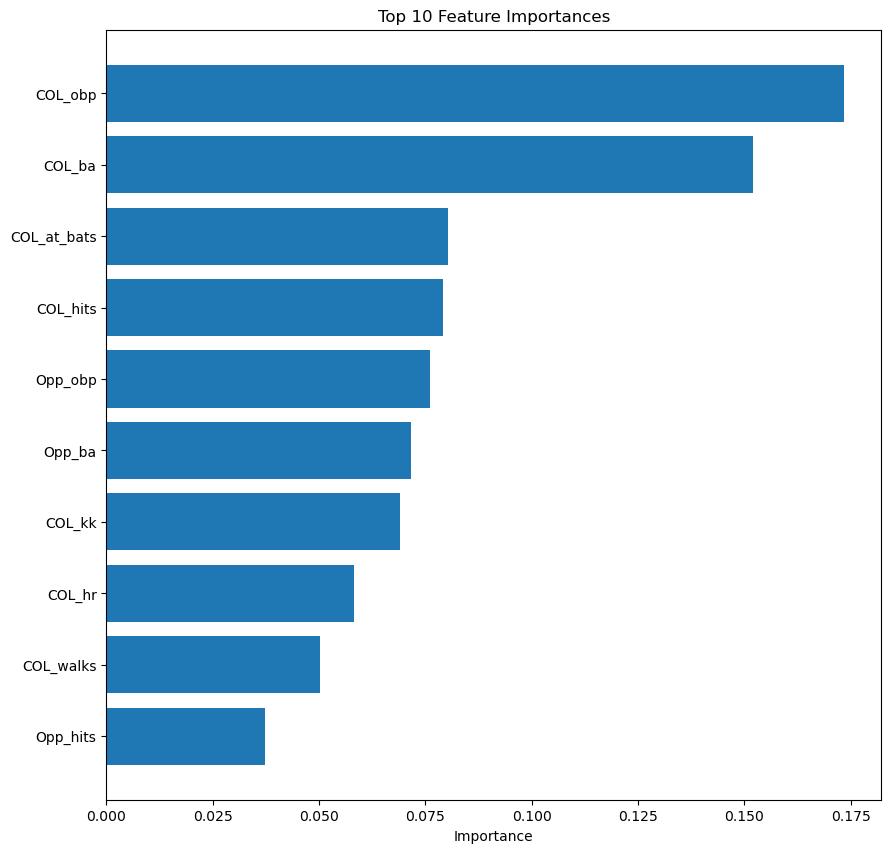

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Extract feature importances
importances = rf_model.feature_importances_

# Step 2: Create a DataFrame for visualization
# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)

# Step 3: Plot the feature importances
plt.figure(figsize=(10, 10))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()